In [3]:
import pandas as pd

creditDF = pd.read_csv('Credit_train.csv')
testDF = pd.read_csv('Credit_test.csv')

testDF.dropna()

,BUSAGE,BUSTYPE,MAXLINEUTIL,DAYSDELQ,TOTACBAL,DEFAULT
0,354.0,A,3.0425,0.0,152125.57,N
1,99.0,A,0.0000,0.0,151060.87,N
2,100.0,A,2.4507,0.0,122538.61,N
3,85.0,C,1.1397,0.0,113975.36,N
4,82.0,A,1.1241,0.0,112415.67,N
...,...,...,...,...,...,...
4765,12.0,A,0.0006,0.0,3.17,N
4766,93.0,A,0.0000,0.0,1.80,N
4767,313.0,B,0.0000,0.0,1.00,N
4768,13.0,A,0.0000,0.0,0.75,N


In [4]:
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


In [6]:
# Question 2.
# train
frq = creditDF.groupby('DEFAULT').size()
maxFRQ = frq.sort_values(ascending=False)
zeroR = maxFRQ.head(n=1).index[0]

print("zeroR:", zeroR)

# test
count = testDF['DEFAULT'].size
error = len(testDF.loc[testDF['DEFAULT'] != zeroR].dropna())
other_error = len(testDF.loc[testDF['DEFAULT'] != 'Y'].dropna())
acc_error = 1-(error/(error+other_error))
accuracy = 1-(error/count)

print("count:", count)
print("error:", error)
print("other_error:", other_error)
print("error sum:", error+other_error)
##########
print("acc_error:", acc_error)
##########
print("accuracy:", accuracy)

zeroR: N
count: 7072
error: 409
other_error: 4297
error sum: 4706
acc_error: 0.9130896727581811
accuracy: 0.9421662895927602


In [26]:
# Question 3.
# drop nan's
creditDFnoNAN = creditDF.dropna()
testDFnoNAN = testDF.dropna()

def oneR(column_name, checkingErrors=False):
  ct = pd.crosstab(creditDF[column_name], creditDF['DEFAULT'], dropna=True)

  df_data = []
  for row in ct.index.values:
    maximalYesNo = ct.loc[row].sort_values(ascending=False).index[0]
    df_data.append([row, maximalYesNo])
    # print(f"Row {row}:", maximalYesNo)

  daysdelq_df = pd.DataFrame(df_data, columns=[column_name, 'Prediction'])

  correct = 0
  error = 0
  for index in testDFnoNAN.index.values:
    row = testDFnoNAN.loc[index]
    modelRow = daysdelq_df.loc[daysdelq_df[column_name] == row[column_name]]
    try:
      # print(modelRow)
      # print(row['DEFAULT'])
      # print("Actual:", row['DEFAULT'])
      if modelRow['Prediction'][0] == row['DEFAULT']:
        correct += 1
      else:
        error += 1
    except:
      pass

  if checkingErrors:
    return error/len(testDFnoNAN)
  else:
    return correct/len(testDFnoNAN)

for elem in ['DAYSDELQ', 'BUSAGE', 'BUSTYPE', 'MAXLINEUTIL', 'TOTACBAL']:
  print(elem, ":", oneR(elem)) 

DAYSDELQ : 0.9028899277518062
BUSAGE : 0.0
BUSTYPE : 0.5486612834679133
MAXLINEUTIL : 0.22290692732681683
TOTACBAL : 0.0


In [283]:
# Question 4.
print('DAYSDELQ:', oneR('DAYSDELQ', checkingErrors=True))

DAYSDELQ: 0.08202294942626434


In [46]:
# Question 5.
# generate confusion matrix
cm = [[18, 11],
      [391, 4286]]
# sensitivity
sensitivity = cm[0][0]/(cm[0][0]+cm[1][0])
print('Sensitivity:', sensitivity)

Sensitivity: 0.044009779951100246


In [47]:
# Question 6.
# P(C|X) = (P(X|C) * P(C))/P(X)
(0.1*0.4)/0.5 # P(C|X)

0.08000000000000002

In [51]:
# Question 7.
# generate confusion matrix
cm = [[15, 10],
      [394, 4287]]
# accuracy
accuracy=(cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print ('Accuracy:', accuracy)

# sensitivity
sensitivity = cm[0][0]/(cm[0][0]+cm[1][0])
print('Sensitivity:', sensitivity)

Accuracy: 0.9141521461963451
Sensitivity: 0.03667481662591687


[1] "Area under the curve: 0.709156664607071"


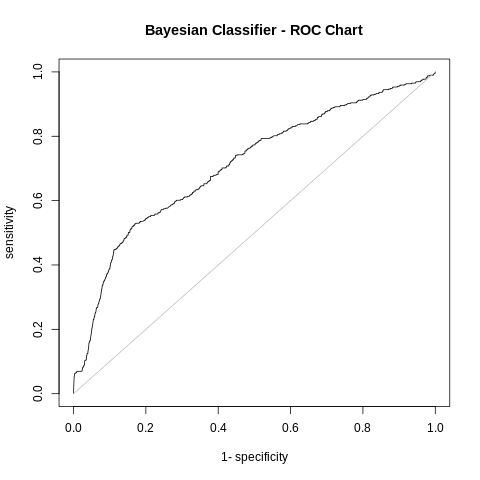

In [83]:
%%R
# Question 8.
#----------
# Bayesian
#----------
library("caret")
library("e1071")
library("AUC")

train <- read.csv("Credit_train.csv")
test <- read.csv("Credit_test.csv")

#train
model.Bayes <- naiveBayes(DEFAULT~., data = train)

#roc chart
labels <- as.factor(ifelse(pred.Bayes$target=="Y", 1, 0))
predictions <- pred.Bayes$score
print(paste("Area under the curve:", auc(roc(predictions, labels), min = 0, max = 1)))
plot(roc(predictions, labels), min=0, max=1, type="l", main="Bayesian Classifier - ROC Chart")

[1] "MAXLINEUTIL is the root node of the decision tree."


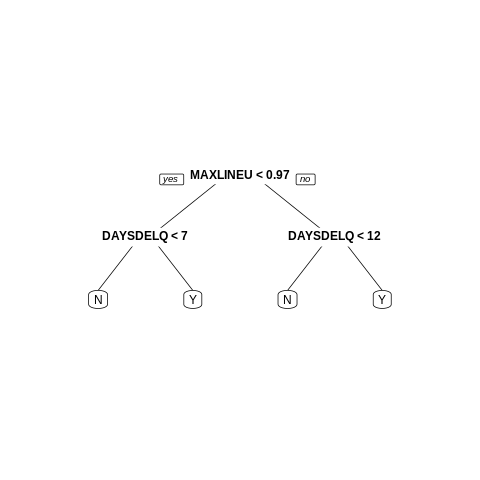

In [84]:
# Question 9.
%%R
#---------------
# Decision tree
#---------------
library(caret)
library(rpart)
library(rpart.plot)	
library(AUC)

#train
model.Dtree <- rpart(DEFAULT~., data = train, method="class")
prp(model.Dtree)
print("MAXLINEUTIL is the root node of the decision tree.")

In [79]:
# Question 10.
cm = [[17, 5],
      [392, 4292]]
# accuracy - (top-left + bottom-right) / all four cells
accuracy=(cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print ('Accuracy:', accuracy)

# sensitivity
sensitivity = cm[0][0]/(cm[0][0]+cm[1][0])
print('Sensitivity:', sensitivity)

Accuracy: 0.9156396090097747
Sensitivity: 0.04156479217603912


[1] "Area under the curve for decision tree model: 0.653043083333877"


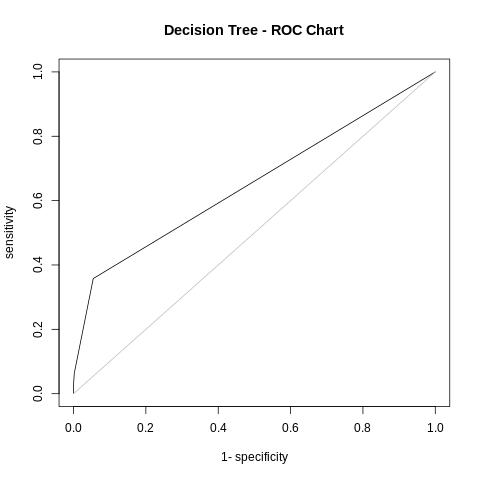

In [96]:
# Question 11.
%%R
#lift chart
pb <- NULL
pb <- predict(model.Dtree, test)
pb <- as.data.frame(pb)
pred.Dtree <- data.frame(test$DEFAULT, pb$Y)
colnames(pred.Dtree) <- c("target","score")

# roc chart
labels <- as.factor(ifelse(pred.Dtree$target=="Y", 1, 0))
predictions <- pred.Dtree$score
print(paste("Area under the curve for decision tree model:", auc(roc(predictions, labels), min = 0, max = 1)))
plot(roc(predictions, labels), min=0, max=1, type="l", main="Decision Tree - ROC Chart")

In [178]:
# Question 12.
import math

def entropy(one, two):
  if one == 0 or two == 0:
    return 0
  oneNormal = one/(one+two)
  twoNormal = two/(one+two)
  res = -(oneNormal * math.log(oneNormal, 2)) - (twoNormal * math.log(twoNormal, 2))
  return res 

entropy(17373, 1636)

0.4231953698010846

In [211]:
# Question 13.
from scipy.stats import entropy as entropySP

# def entropyCT(ct):
#   total = ct.sum().sum()
#   summed_entropy = 0
#   for letter in ['A', 'B', 'C', 'D', 'E', 'F']:
#     row = ct.loc[letter]
#     segment_e = row.sum()/total * entropy(row['Y'], row['N'])
#     print(f"segment_e {letter}: {segment_e}, p: {row.sum()/total}, E: {entropy(row['Y'], row['N'])}")
#     summed_entropy += segment_e
#   return summed_entropy

ct = pd.crosstab(creditDF.dropna()['BUSTYPE'], creditDF.dropna()['DEFAULT'])
entropySP(ct, base=2)[0]

1.5147434386168481

In [250]:
# Question 14.
ct = pd.crosstab(creditDF.dropna()['DAYSDELQ'], creditDF.dropna()['DEFAULT'])
entropySP(ct, base=2)[0]

0.10831538926159248

In [282]:
# Question 15.
entropyDefault = entropySP(testDFnoNAN.groupby('DEFAULT').size().values, base=2)
ct = pd.crosstab(testDFnoNAN['DAYSDELQ'], testDFnoNAN['DEFAULT'])
entropyDefault - entropySP(ct, base=2)[0]

0.3161571558335841